In [22]:
import pickle

import seaborn
import numpy as np
import torch
from einops import rearrange
from torchmetrics import ConfusionMatrix
from torchmetrics.classification import BinaryAccuracy

from project.pipeline.balance_data import balance_data_indices_reduction
from project.pipeline.data_loader import DataLoader
from project.task_a.train_mlp import build_model

In [23]:
with open('../cached/toxic_bert_results.pickle', 'rb') as handle:
    features = pickle.load(handle)
    features = torch.tensor(list(features.values()))
    features = rearrange(features, "f n -> n f")

In [24]:
model_path = "../trained_agents/feed_forward.pt"
mlp = build_model(model_path)

In [25]:
is_sexist = mlp(features)
is_sexist = rearrange(is_sexist, "n 1 -> n")
print(is_sexist.shape)

torch.Size([14000])


In [26]:
df_data = DataLoader().df
len(df_data)

14000

In [27]:
balanced_df_indices = balance_data_indices_reduction(df_data['label_sexist'])

In [28]:
target = df_data['label_sexist']
target = torch.tensor(np.array([entry != "not sexist" for entry in target]))
predictions = is_sexist

In [38]:
accuracy_metric = BinaryAccuracy()
confusion_matrix_metric = ConfusionMatrix(num_classes=2)
labels = ["not sexist", "sexist"]

Accuracy on whole dataset: 0.6847142577171326


<AxesSubplot: >

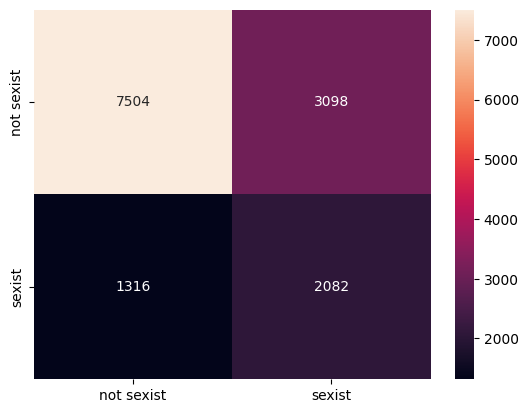

In [39]:
acc = accuracy_metric(predictions, target)
mat = confusion_matrix_metric(predictions, target)
print(f"Accuracy on whole dataset: {acc}")
seaborn.heatmap(mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

Accuracy on balanced dataset: 0.6614184975624084


<AxesSubplot: >

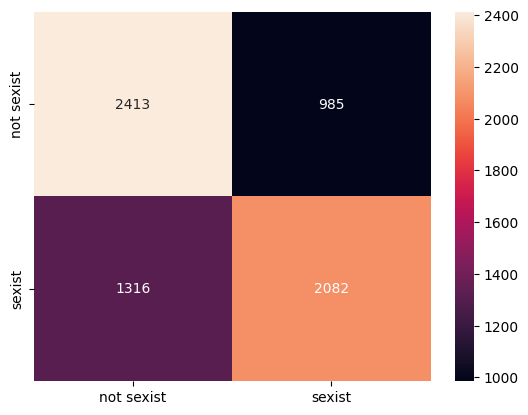

In [41]:
acc = accuracy_metric(predictions[balanced_df_indices], target[balanced_df_indices])
mat = confusion_matrix_metric(predictions[balanced_df_indices], target[balanced_df_indices])
print(f"Accuracy on balanced dataset: {acc}")
seaborn.heatmap(mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)